# Assignment: Deep Learning

In [73]:
import pandas as pd

import sklearn
import sklearn.datasets
import sklearn.preprocessing

import seaborn as sns

import keras
from keras import models
from keras import layers
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1 (20 points)

In this problem you work with the IMDB dataset, a set of 50,000 reviews from the Internet Movie Database.
You will perform the following experiments and compare the performance to the model implemented earlier in the lecture notes. Please refer to lecture notes for pre-processing steps.

1. We used two hidden layers in our deep NN model. Try using one and three hidden layers. Report how doing so affects validation and test accuracy.

**ANSWER**

First, we load the dataset and write the required functions.

In [3]:
from keras.datasets import imdb

def vectorize_sequence(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
    
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

With the dataset out of the way, we can now split the dataset into both training and validation sets.

In [3]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

Now that we have both the test and validation datasets, we can fit both types of models.

In [4]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation="relu", input_shape=(10_000,)))
model1.add(layers.Dense(1, activation="sigmoid"))
model1.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model2 = models.Sequential()
model2.add(layers.Dense(16, activation="relu", input_shape=(10_000,)))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
hist1 = model1.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)
hist2 = model2.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)

W0831 12:47:22.892467 4684838336 deprecation_wrapper.py:119] From /opt/homebrew/Cellar/python36/3.6.2+_254.20170915/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 12:47:22.904709 4684838336 deprecation_wrapper.py:119] From /opt/homebrew/Cellar/python36/3.6.2+_254.20170915/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 12:47:22.907294 4684838336 deprecation_wrapper.py:119] From /opt/homebrew/Cellar/python36/3.6.2+_254.20170915/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 12:47:22.951567 4684838336 deprecation_wrapper.py:119

With the models trained, we can now view the training and validation loss for our two models.

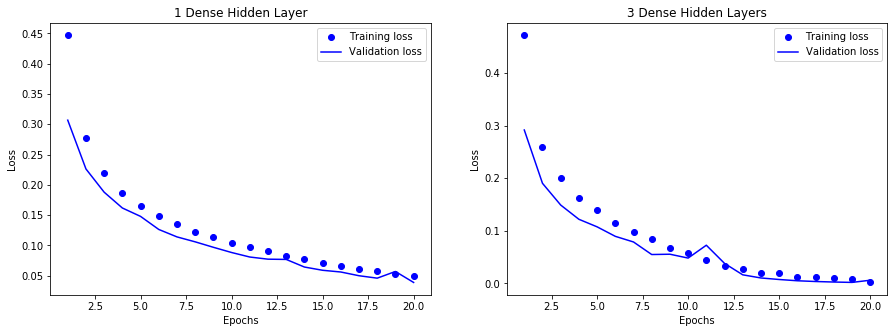

In [5]:
def compare_plots(hist1, hist2, title1, title2):
    epochs = range(1, len(hist1.history["loss"]) + 1)
    fig = plt.figure(figsize=(15,5))
    ax_left = fig.add_subplot(121)
    ax_right = fig.add_subplot(122)

    ax_left.plot(epochs, hist1.history["loss"], "bo", label="Training loss")
    ax_left.plot(epochs, hist1.history["val_loss"], "b", label="Validation loss")
    ax_left.title.set_text(title1)
    ax_left.set_xlabel("Epochs")
    ax_left.set_ylabel("Loss")
    ax_left.legend()

    ax_right.plot(epochs, hist2.history["loss"], "bo", label="Training loss")
    ax_right.plot(epochs, hist2.history["val_loss"], "b", label="Validation loss")
    ax_right.title.set_text(title2)
    ax_right.set_xlabel("Epochs")
    ax_right.set_ylabel("Loss")
    ax_right.legend()
    plt.show()
compare_plots(hist1, hist2, title1="1 Dense Hidden Layer", title2="3 Dense Hidden Layers")

Here, we see that there is not much of a difference between the single hidden dense layer and the 3 hidden dense layers.

2. We used 16 hidden neurons in our example. Try using 2 layers with more hidden units (32 and 64 units). Report how doing so affects validation and test accuracy.

**ANSWER**

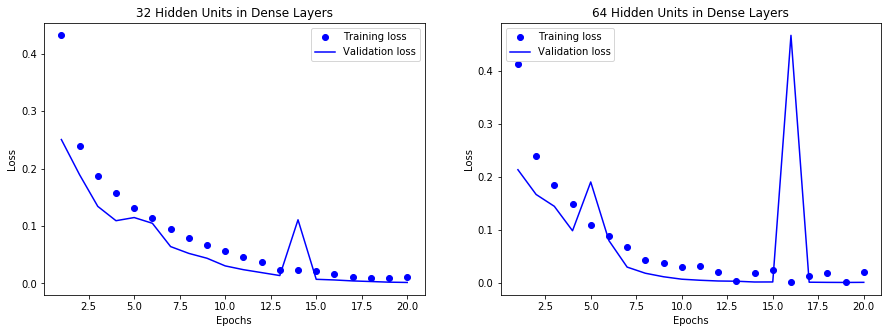

In [6]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation="relu", input_shape=(10_000,)))
model1.add(layers.Dense(32, activation="relu"))
model1.add(layers.Dense(1, activation="sigmoid"))
model1.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model2 = models.Sequential()
model2.add(layers.Dense(64, activation="relu", input_shape=(10_000,)))
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
compare_plots(
    model1.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    ), 
    model2.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    ), 
    title1="32 Hidden Units in Dense Layers", 
    title2="64 Hidden Units in Dense Layers"
)

Here, we see that the additional dense layers cause the model to have larger validation loss over time.

3. We used binary-crossentropy for the loss function in our example. Try using the mse loss function and report how doing so affects validation and test accuracy.

**ANSWER**

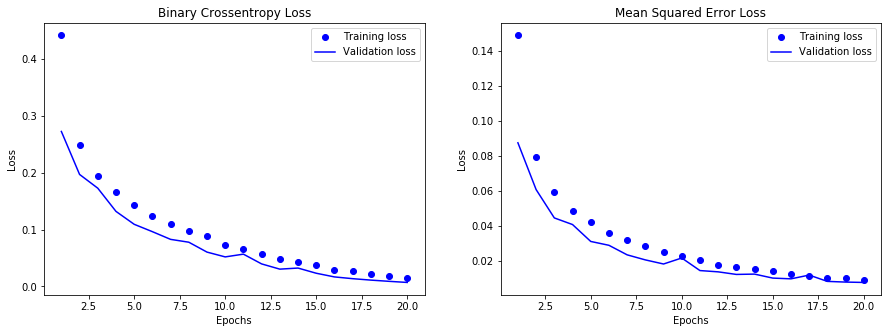

In [7]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation="relu", input_shape=(10_000,)))
model1.add(layers.Dense(16, activation="relu"))
model1.add(layers.Dense(1, activation="sigmoid"))
model1.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model2 = models.Sequential()
model2.add(layers.Dense(16, activation="relu", input_shape=(10_000,)))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="mean_squared_error",
    metrics=["accuracy"]
)
compare_plots(
    model1.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    ), 
    model2.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    ), 
    title1="Binary Crossentropy Loss", 
    title2="Mean Squared Error Loss"
)

Here, we see that the MSE loss function has much smaller loss per epoch.

4. Try using the tanh activation instead of relu and report how doing so affects validation and test accuracy.
Round your answers to 3 decimal places.

**ANSWER**

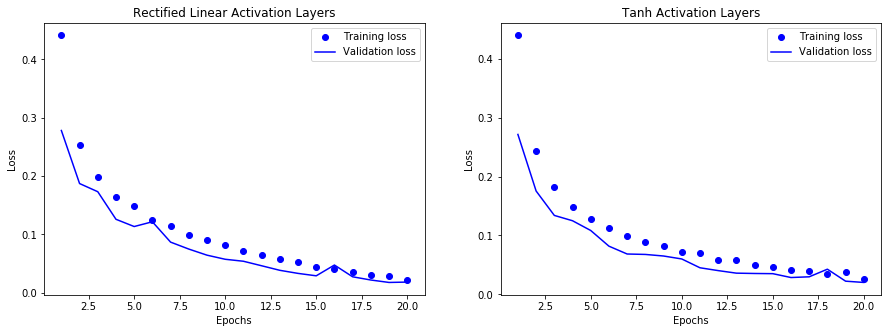

In [8]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation="relu", input_shape=(10_000,)))
model1.add(layers.Dense(16, activation="relu"))
model1.add(layers.Dense(1, activation="sigmoid"))
model1.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model2 = models.Sequential()
model2.add(layers.Dense(16, activation="tanh", input_shape=(10_000,)))
model2.add(layers.Dense(16, activation="tanh"))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
compare_plots(
    model1.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    ), 
    model2.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0
    ), 
    title1="Rectified Linear Activation Layers", 
    title2="Tanh Activation Layers"
)

Here, we see that there is not much of a difference between the relu and tanh activation layers.

## Problem 2 (35 points)

In this problem you work with the Boston housing dataset (available in R and Python) and predict the median price of homes in a given Boston suburb in the mid-1970's, given data points about the suburb at the time, such as the crime rate, the local property tax rate, etc..
1. Load and pre-process the data using Gaussian normalization.

**ANSWER**

With sklearn module, we can load the dataset and normalize it using the same module.

In [46]:
boston_df = pd.DataFrame(
    data=sklearn.preprocessing.normalize(sklearn.datasets.load_boston().data, norm="l2"),
    index=sklearn.datasets.load_boston().target,
    columns=sklearn.datasets.load_boston().feature_names
).sort_index()
print(sklearn.datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

2. Create a deep NN with two 64-unit dense layers. What are your metric and loss function when compiling the model?

**ANSWER**

The metric we will use to gauge this model will be its accuracy. The loss function we will be using will be Binary Crossentropy.

In [78]:
#sns.pairplot(boston_df,size=2)

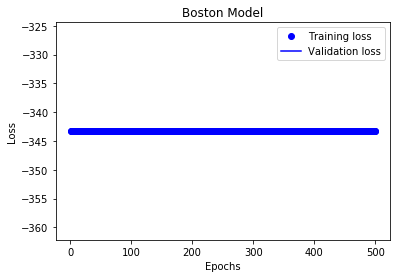

In [80]:
msk = np.random.rand(len(boston_df)) < 0.8
train_df = boston_df[msk]
val_df = boston_df[~msk]

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(boston_df.shape[1],)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="softmax"))
model.compile(
    optimizer=optimizers.RMSprop(lr=0.1),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    boston_df.values,
    boston_df.index,
    epochs=500,
    batch_size=1,
    validation_data=(boston_df.values, boston_df.index),
    verbose=0
)
epochs = range(1, len(history.history["loss"]) + 1)
plt.plot(epochs, history.history["loss"], "bo", label="Training loss")
plt.plot(epochs, history.history["val_loss"], "b", label="Validation loss")
plt.title("Boston Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


3. Since the data set is small, you will use k-fold cross-validation instead of the hold-out. Use 4-fold cross-validation to fit the model for epochs = 500 and batch size = 1. Report the MAE on the 4 validation sets. Is there a lot of variation in MAE from one fold to another?

**ANSWER**

4. Plot the average of the per-epoch MAE scores for all folds vs the epoch number (*Hint*: use history). Based on this plot around which epoch should the training had stopped?

**ANSWER**

5. Train a final production model on all of the training data, with the appropriate number of epochs (from above), and report its performance on the test data.

**ANSWER**